# Cosine-Predicting Neural Network

## Import Libraries

In [306]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.layer_utils import count_params
import time

# show library versions
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

TensorFlow version: 2.9.0
NumPy version: 1.22.4


## Generate Dataset
* Input Variables (X)
  * Radian angle input from -2pi to 2pi
* Output Variables (y)
  * Cosine of X

Text(0.5, 0, 'X')

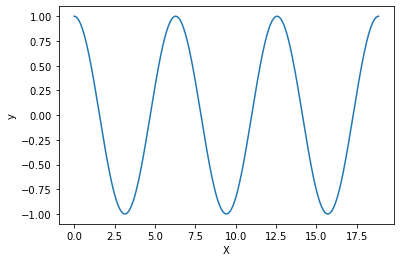

In [307]:
X = np.linspace(0, 6*np.pi, 1000)
y = np.cos(X)

plt.plot(X, y)
plt.ylabel("y")
plt.xlabel("X")

## Add Noise to Dataset

## Split Dataset into Test & Train subsets

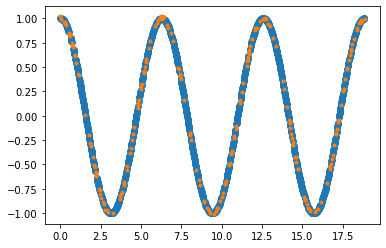

In [308]:
# split test & train datasets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)

# add some noise to the data
y_train = y_train + np.random.normal(scale=0.0, size=len(X_train))
y_test = y_test + np.random.normal(scale=0.01, size=len(X_test))

plt.scatter(X_train, y_train, marker="o")
plt.scatter(X_test, y_test, marker=".")

## Neural Network: Define, Compile, Fit, Evaluate

In [309]:
def cos_model(loss, epochs, batch_size, model_layout):

    start_time = time.time()

    # define model
    model = Sequential()
    
    # first hidden layer
    model.add(Dense(model_layout[0], input_dim=1, activation='tanh'))

    # remaining hidden layers
    depth = len(model_layout)
    for width in model_layout[1:]:
        model.add(Dense(width, activation='tanh'))

    # output layer
    model.add(Dense(1, activation='linear'))
    trainable_parameters = count_params(model.trainable_weights)

    # compile the model
    model.compile(loss=loss, optimizer='adam', metrics=['mse'])

    # train (fit) the model to the dataset
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=batch_size, verbose=0)

    # plot loss during training
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    # make probability predictions with the model
    X_predict = np.linspace(np.pi, 3*np.pi, 1000)
    predictions = model.predict(X_predict)

    # plot prediction vs truth
    plt.plot(X, y, label='truth')
    plt.plot(X_predict, predictions, label='predictions')
    plt.legend()
    plt.show()

    # evaluate the keras model
    _, train_mse = model.evaluate(X_train, y_train, verbose=0)
    _, test_mse = model.evaluate(X_test, y_test, verbose=0)

    end_time = time.time()
    duration = end_time - start_time

    print('Depth:      %s' % depth)
    print('Parameters: %s' % trainable_parameters)
    print('Train MSE:  %.4f' % train_mse)
    print('Duration:   %.4f sec' % duration)

    return np.array([depth, trainable_parameters, train_mse, duration])


2022-05-29 13:57:03.320801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-29 13:57:03.594197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


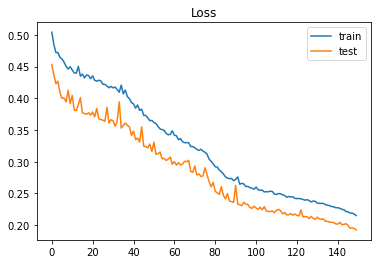

32/32 [==============================] - 0s 2ms/step


2022-05-29 13:57:28.132432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


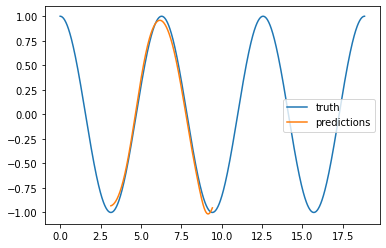

2022-05-29 13:57:28.337057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Depth:      3
Parameters: 449
Train MSE:  0.2133
Test MSE:   0.1925
Duration:   25.4151 sec


In [316]:
results = []
performance = cos_model('mean_squared_error', 200, 20, [12, 16, 12])
results.append(performance)


2022-05-29 13:53:37.201651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-29 13:53:37.602698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


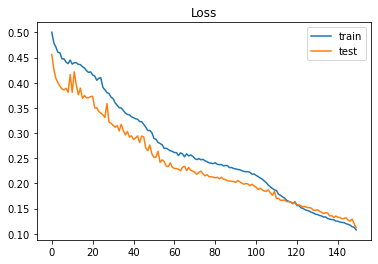

32/32 [==============================] - 0s 2ms/step


2022-05-29 13:54:23.115813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


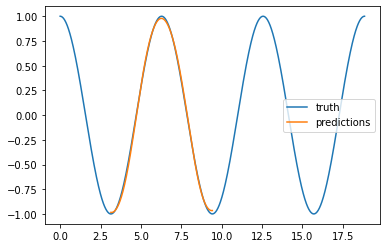

2022-05-29 13:54:23.316798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Depth:      3
Parameters: 449
Train MSE:  0.1044
Test MSE:   0.1117
Duration:   46.4560 sec


In [311]:
performance = cos_model('mean_squared_error', 180, 10, [12, 16, 12])
results.append(performance)

2022-05-29 13:54:23.699435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-29 13:54:24.171173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


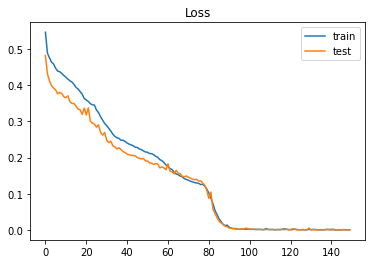

32/32 [==============================] - 0s 3ms/step


2022-05-29 13:55:16.291082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


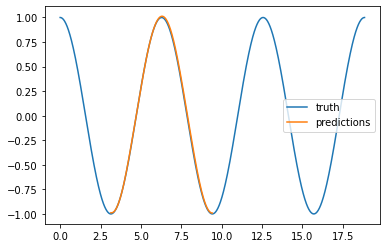

Depth:      4
Parameters: 549
Train MSE:  0.0006
Test MSE:   0.0006
Duration:   53.1867 sec


2022-05-29 13:55:16.513045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [312]:
performance = cos_model('mean_squared_error', 100, 10, [12, 16, 12, 8])
results.append(performance)

2022-05-29 13:55:16.893561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-29 13:55:17.349878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


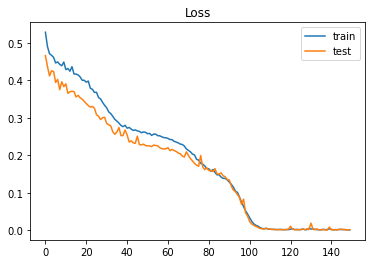

32/32 [==============================] - 0s 4ms/step


2022-05-29 13:56:09.463186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


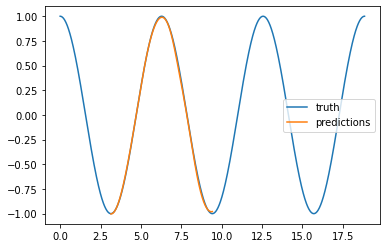

Depth:      4
Parameters: 605
Train MSE:  0.0008
Test MSE:   0.0010
Duration:   53.2035 sec


2022-05-29 13:56:09.726461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [313]:
performance = cos_model('mean_squared_error', 120, 10, [12, 16, 12, 12])
results.append(performance)

2022-05-29 13:56:10.120328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-29 13:56:10.676236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


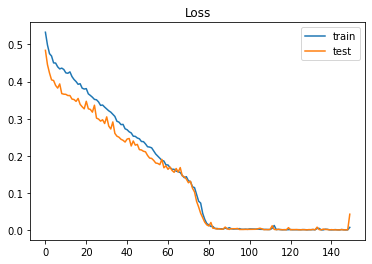

32/32 [==============================] - 0s 2ms/step


2022-05-29 13:57:02.705912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


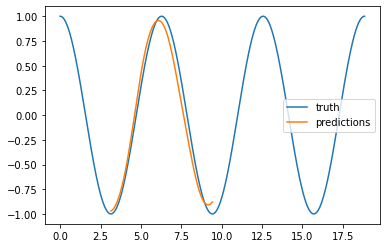

Depth:      4
Parameters: 649
Train MSE:  0.0387
Test MSE:   0.0428
Duration:   53.1686 sec


2022-05-29 13:57:02.922265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [314]:
performance = cos_model('mean_squared_error', 150, 10, [12, 16, 16, 8])
results.append(performance)

In [315]:
print(results)
# plt.scatter(elapsed_time, train_mse, s=model.count_params(), alpha=0.5)

[array([3.00000000e+00, 4.49000000e+02, 4.26913112e-01, 3.93093777e+00]), array([3.00000000e+00, 4.49000000e+02, 4.26913112e-01, 3.93093777e+00]), array([3.00000000e+00, 4.49000000e+02, 4.26913112e-01, 3.93093777e+00]), array([3.00000000e+00, 4.49000000e+02, 4.26913112e-01, 3.93093777e+00]), array([3.00000000e+00, 4.49000000e+02, 4.26913112e-01, 3.93093777e+00])]
